In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

Let $X$ be the treatment, $Y$ the outcome and $Z$ the covariates.

Suppose the true model is 



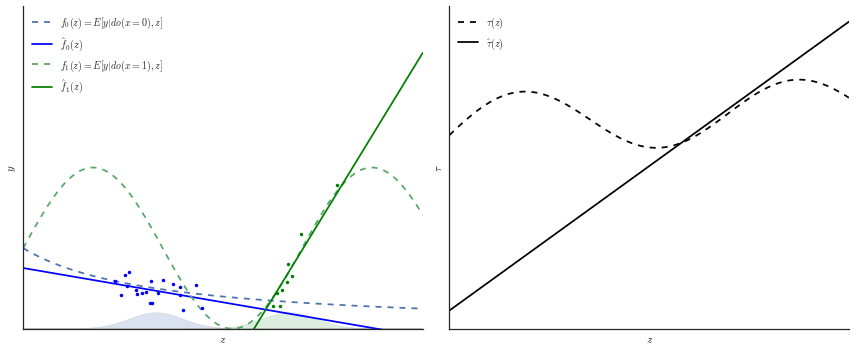

In [114]:
np.random.seed(3)
def y1(x):
    #return np.power(x,.2)
    return np.sin(3*x)+1

def y0(x):
    return 1/(x+1)

n0 = 20
n1 = 10
x_wo = norm(1,.2)
x_w1 = norm(2,.2)

x1 = x_w1.rvs(n1)
x0 = x_wo.rvs(n0)
y1v = y1(x1)+norm(0,.1).rvs(n1)
y0v = y0(x0)+norm(0,.1).rvs(n0)

model1 = LinearRegression()
model1.fit(x1.reshape(-1,1),y1v)

model2 = LinearRegression()
model2.fit(x0.reshape(-1,1),y0v)

sns.set_style("ticks")

fig,ax = plt.subplots(1,2,figsize=(12,5))
x = np.linspace(0,3,100)
s = .1
fx0 = s*x_wo.pdf(x)
fx1 = s*x_w1.pdf(x)

yfit1 = model1.predict(x.reshape(-1,1))
yfit0 = model2.predict(x.reshape(-1,1))
ax[0].fill(x,fx0,alpha = 0.2)
ax[0].fill(x,fx1,alpha = 0.2)
ax[0].plot(x,y0(x),linestyle="--",label = "$f_0(z) = E[y|do(x=0),z]$")
ax[0].plot(x,yfit0,color="blue",label="$\hat{f}_0(z)$")
ax[0].plot(x,y1(x),linestyle="--",label = "$f_1(z)=E[y|do(x=1),z]$")
ax[0].plot(x,yfit1,color="green",label="$\hat{f}_1(z)$")

ax[0].plot(x0,y0v,".",color="blue")
ax[0].plot(x1,y1v,".",color="green")



ax[0].set_ylim(0,3)

ax[1].plot(x,y1(x)-y0(x),linestyle="--",color="black",label = "$\\tau(z)$")
ax[1].plot(x,yfit1-yfit0,color="black",label= "$\hat{\\tau}(z)$")
ax[1].legend(loc="upper left")
ax[0].legend(loc="upper left")
sns.despine()
#ax[1].yaxis.set_visible(False)
#ax[1].xaxis.set_visible(False)
#ax[0].yaxis.set_visible(False)
#ax[0].xaxis.set_visible(False)
ax[1].set_xlabel("$z$")
ax[0].set_xlabel("$z$")
ax[1].set_ylabel("$\\tau$")
ax[0].set_ylabel("$y$")
ax[0].set_ylim(0,4)
ax[0].set_xticks([]) 
ax[0].set_yticks([]) 
ax[1].set_xticks([]) 
ax[1].set_yticks([]) 
#ax.plot(x,y1(x)-y0(x))
plt.tight_layout()
fig.savefig('covariate_shift_estimation.pdf', format='pdf', dpi=1200)


0.00549826878968 0.583758292289


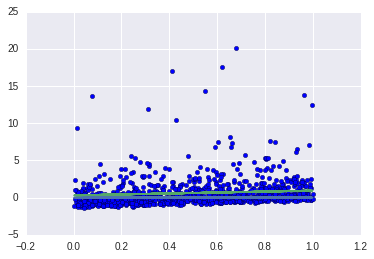

In [33]:
from sklearn import linear_model
n = 1000
a = 1
x = np.random.uniform(0,1,size=n)
noise = lognorm(.9)
y = a*x+noise.rvs(n) - noise.mean()
plt.scatter(x,y)

X = x.reshape(-1,1)
clf1 = linear_model.SGDRegressor(penalty='none',loss='huber',epsilon=0.01)
clf1.fit(X, y)
yhat1 = clf1.predict(X)

clf2 = linear_model.SGDRegressor(penalty='none',loss='squared_loss')
clf2.fit(X, y)
yhat2 = clf2.predict(X)

print yhat.mean(),y.mean()
plt.plot(x,yhat)
plt.plot(x,yhat2)


7.26670098556 1.00058016151


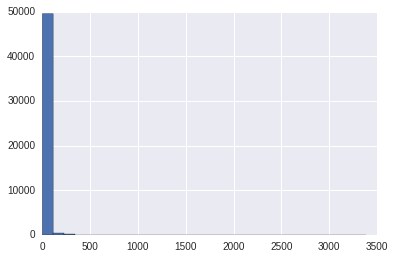

In [13]:
from sklearn import linear_model
>>> n_samples, n_features = 10, 5
>>> np.random.seed(0)
>>> y = np.random.randn(n_samples)
>>> X = np.random.randn(n_samples, n_features)
>>> clf = linear_model.SGDRegressor()
>>> clf.fit(X, y)
... 
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
             fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
             loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, verbose=0, warm_start=False)
from scipy.stats import lognorm
s = 2
dist = lognorm(s)

d = dist.rvs(50000)
a = plt.hist(d,bins=30)
print d.mean(),np.median(d)